In [115]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier



from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import fetch_openml

In [124]:
mnist = fetch_openml(data_id=554)

In [125]:
# type(mnist)
mnist

{'data': array([[ 3.,  3.,  1.],
        [ 1.,  3.,  1.],
        [ 4.,  3.,  1.],
        ...,
        [ 4.,  0., 18.],
        [ 2.,  0., 18.],
        [ 0.,  0., 18.]]),
 'target': array([1.4633e+04, 2.8300e+02, 2.3700e+02, 6.0000e+01, 1.2800e+03,
        1.2360e+03, 1.5820e+03, 8.7600e+02, 1.9700e+02, 7.4700e+02,
        9.0000e+00, 4.2000e+01, 0.0000e+00, 0.0000e+00, 1.9000e+01,
        2.6000e+01, 2.8000e+01, 1.6000e+01, 0.0000e+00, 2.0000e+01,
        1.6960e+03, 1.6000e+01, 3.7000e+01, 0.0000e+00, 9.6000e+02,
        1.4435e+04, 4.2000e+01, 0.0000e+00, 2.0000e+00, 2.4650e+03,
        2.8200e+02, 2.7600e+02, 0.0000e+00, 0.0000e+00, 3.9200e+02,
        2.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.2000e+01, 1.5000e+01, 0.0000e+00, 0.0000e+00, 2.2000e+01,
        3.1570e+03, 1.7000e+01, 0.0000e+00, 1.3000e+01, 4.3390e+03,
        1.0871e+04, 1.0000e+00, 2.6000e+01, 0.0000e+00, 4.8800e+02,
        1.2000e+01, 1.5000e+01, 0.0000e+00, 0.0000e+00, 2.0000e+01,
 

In [16]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [18]:
mnistDF = pd.DataFrame(mnist.data , 
                       columns = mnist.feature_names)

In [20]:
mnistDF['target'] = mnist.target

In [23]:
mnistDF

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [24]:
y_target   = mnistDF['target']
X_features = mnistDF.drop(['target'] , axis=1 , inplace=False) 

In [34]:
type(X_features) , type(y_target) , X_features.shape , y_target.shape

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 (70000, 784),
 (70000,))

In [93]:
X , y = mnist['data'] , mnist['target']
y = y.astype(np.int8)

In [94]:
type(X) , type(y) , X.shape , y.shape

(numpy.ndarray, numpy.ndarray, (70000, 784), (70000,))

In [95]:
reshape_img = X[1].reshape(28, 28)
reshape_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

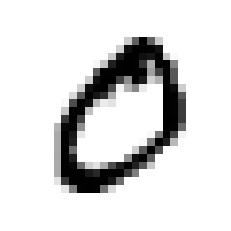

In [96]:
plt.imshow(reshape_img , cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [97]:
y[1]

0

In [98]:
X_train, X_test , y_train , y_test = X[ : 60000] , X[ 60000 : ] , y[:60000] , y[60000 : ]

In [99]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

In [100]:
# 확습
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle] , y_train[shuffle]
# shuffle


In [101]:
# 테스트
X_test , y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int8))

In [102]:
dt = DecisionTreeClassifier(random_state=35 ) 
dt.fit(X_train , y_train)
dt_pred = dt.predict(X_test)

In [103]:
print('tree : ' , accuracy_score(y_test , dt_pred))


tree :  0.8812


In [126]:
clf_model = RandomForestClassifier()
clf_model.fit(X_train , y_train)
clf_pred = clf_model.predict(X_test)
print('tree : ' , accuracy_score(y_test , clf_pred))

tree :  0.9702


In [104]:
# 이진 분류를 위해서 (Binary Classifier)
# 7 
y_train_seven = (y_train == 7) 
y_train_seven

array([ True, False, False, ..., False, False, False])

In [105]:
# 확률적 경사하강법(SGD) -> stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier 

sgd_model = SGDClassifier(random_state = 50)
sgd_model.fit(X_train, y_train_seven)


SGDClassifier(random_state=50)

In [110]:
sgd_model.predict([X[7]])

array([False])

In [111]:
# 교차 검증 cross_val_score()
scores = cross_val_score(sgd_model , X_train, y_train_seven, cv=5 , scoring='accuracy')
scores

array([0.97991667, 0.95275   , 0.97975   , 0.98      , 0.9805    ])

In [112]:
np.mean(scores)

0.9745833333333334

In [116]:
y_scores = cross_val_predict(sgd_model , X_train, y_train_seven, cv=5 , method='decision_function')
y_scores

array([  1821.72748827,  -9535.69999142, -40323.00565722, ...,
       -15151.12581262, -46271.30737487,  -7381.87320547])

In [117]:
precision , recall , thresholds = precision_recall_curve(y_train_seven , y_scores)
precision , recall , thresholds

(array([0.10884862, 0.10883314, 0.10883503, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99840383e-01, 9.99840383e-01, ...,
        3.19233839e-04, 1.59616919e-04, 0.00000000e+00]),
 array([-70601.40930662, -70593.35719352, -70588.14600242, ...,
         37188.24488355,  41917.1261071 ,  41971.70691852]))

In [121]:
precision.shape , recall.shape , thresholds.shape

((57558,), (57558,), (57557,))

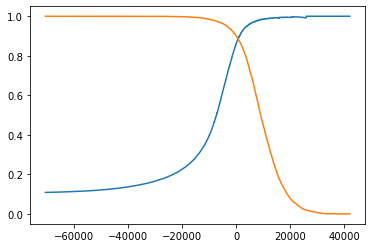

In [123]:

plt.plot(thresholds , precision[:-1] , label='precision')
plt.plot(thresholds , recall[:-1] , label='precision')
plt.show()
